In [2]:
from addit.dit import rundit, runditfold, runditf1
import jax.numpy as jnp
import numpy as np
from addit.ncf import inc3D

In [118]:
N=1
Ng_nu=20000
Ng_beta=15
Ng_gammaL=15

nus=np.linspace(1900.0,2300.0,Ng_nu) #nu grid
beta_grid=np.logspace(-2,1,Ng_beta) #beta grid
gammaL_grid=np.logspace(-4,1,Ng_gammaL)#gammaL grid
S=np.logspace(0.0,2.0,N)
S[0:10]=1000.0

nu_lines=np.linspace(1950.0,2250.0,N)
beta=np.random.rand(N)*0.1
gammaL=np.random.rand(N)*0.01

In [119]:
F0=rundit(S,nu_lines,beta,gammaL,nus,beta_grid,gammaL_grid)
print(len(F0[F0<0]))
F0f=runditf1(S,nu_lines,beta,gammaL,nus,beta_grid,gammaL_grid)
print(len(F0f[F0f<0]))
F0f2=runditfold(S,nu_lines,beta,gammaL,nus,beta_grid,gammaL_grid,2)
print(len(F0f2[F0f2<0]))

17
19
24.99875 49.9975
19


In [115]:
import matplotlib.pyplot as plt

In [116]:
from exojax.spec import xsection
xsv=xsection(nus,nu_lines,beta,gammaL,S)

100%|██████████| 1/1 [00:00<00:00, 694.54it/s]


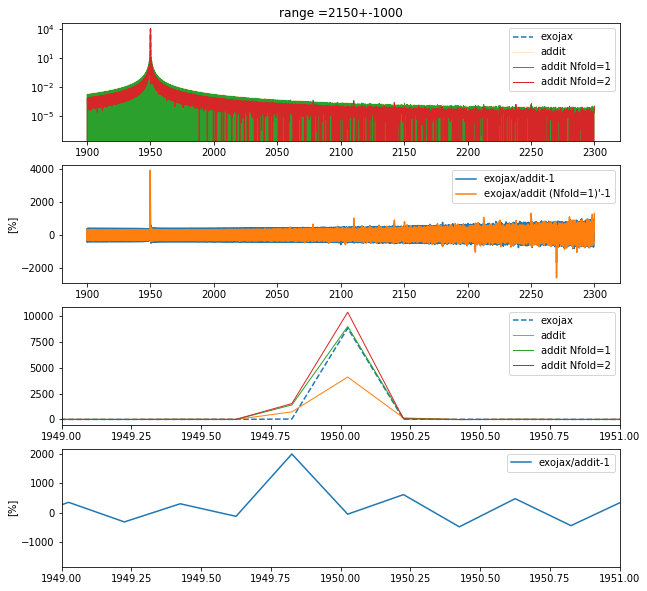

In [117]:
fig=plt.figure(figsize=(10,10))
fig.add_subplot(411)
plt.title("range =2150"+"+-"+str(ll))
plt.plot(nus,xsv,label="exojax",ls="dashed")
plt.plot(nus,F0,label="addit",lw=1,alpha=0.2)
plt.plot(nus,F0f,label="addit Nfold=1",lw=1,alpha=1)
plt.plot(nus,F0f2,label="addit Nfold=2",lw=1,alpha=1)
#plt.xlim(2125,2175)
plt.yscale("log")
plt.legend()
fig.add_subplot(413)
plt.plot(nus,xsv,label="exojax",ls="dashed")
plt.plot(nus,F0,label="addit",lw=1)
plt.plot(nus,F0f,label="addit Nfold=1",lw=1)
plt.plot(nus,F0f2,label="addit Nfold=2",lw=1)
plt.xlim(1949,1951)
#plt.yscale("log")
plt.legend()
fig.add_subplot(412)
plt.plot(nus,(F0-xsv)/xsv*100,label="exojax/addit-1")
plt.plot(nus,(F0f-xsv)/xsv*100,label="exojax/addit (Nfold=1)'-1")
plt.legend()
plt.ylabel("[%]")
fig.add_subplot(414)
plt.plot(nus,(F0-xsv)/xsv*100,label="exojax/addit-1")
plt.legend()
plt.ylabel("[%]")
#plt.ylim(-1,30)
plt.xlim(1949,1951)
plt.savefig("w100.png")

In [85]:
N=1
Ng_nu=100000
Ng_beta=2
Ng_gammaL=2
ll=1000
nus=np.linspace(2150-ll,2150+ll,Ng_nu) #nu grid
db=1.e-20
dg=1.e-20
beta_grid=np.logspace(0.0-db,0.0+db,Ng_beta) #beta grid
gammaL_grid=np.logspace(0.0-dg,0.0+dg,Ng_gammaL)#gammaL grid
S=np.array([1000.])
nu_lines=np.array([2150.])
beta=np.array([1.0])
gammaL=np.array([1.0])

ValueError: x and y must have same first dimension, but have shapes (100000,) and (2000,)

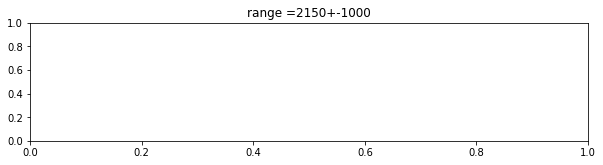

In [86]:
fig=plt.figure(figsize=(10,10))
fig.add_subplot(411)
plt.title("range =2150"+"+-"+str(ll))
plt.plot(nus,xsv,label="exojax",ls="dashed")
plt.plot(nus,F0,label="addit",lw=1)
#plt.xlim(2125,2175)
plt.yscale("log")
plt.legend()
fig.add_subplot(413)
plt.plot(nus,xsv,label="exojax",ls="dashed")
plt.plot(nus,F0,label="addit",lw=1)
plt.xlim(2050,2250)
plt.yscale("log")
plt.legend()
fig.add_subplot(412)
plt.plot(nus,(F0-xsv)/xsv*100,label="exojax/addit-1")
plt.legend()
plt.ylabel("[%]")
fig.add_subplot(414)
plt.plot(nus,(F0-xsv)/xsv*100,label="exojax/addit-1")
plt.legend()
plt.ylabel("[%]")
plt.ylim(-0.1,0.3)
plt.xlim(2050,2250)
plt.savefig("w1000.png")